# Pre-processing of avalanche warning data for machine learning


In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
#from sklearn.preprocessing import LabelEncoder
#from pprint import pprint

#pd.set_option("display.max_rows",6)

%matplotlib inline

In [2]:
# analysis of entire data set - collected using varsomdata2.varsomscripts.avalanchewarningscomplete.get_season_17_18()
varsom_df = pd.read_csv(r'..\..\data\varsom\norwegian_avalanche_warnings_season_17_18.csv', index_col=0)
varsom_df.head()

,author,avalanche_danger,avalanche_problem_1_advice,avalanche_problem_1_cause_id,avalanche_problem_1_cause_name,avalanche_problem_1_destructive_size_ext_id,avalanche_problem_1_destructive_size_ext_name,avalanche_problem_1_distribution_id,avalanche_problem_1_distribution_name,avalanche_problem_1_exposed_height_1,...,region_id,region_name,region_type_id,region_type_name,snow_surface,utm_east,utm_north,utm_zone,valid_from,valid_to
index,,,,,,,,,,,,,,,,,,,,,
0,Karsten@NVE,Det er lite snø og generelt stabile forhold i ...,Vær varsom der skredproblemet er å finne i ko...,15,Dårlig binding mellom lag i fokksnøen,2,2 - Middels,1,Få bratte heng,0,...,3003,Nordenskiöld Land,10,A,Det er generelt lite snø i terrenget. Rygger e...,520332,8663904,33,2017-12-01 00:00:00,2017-12-01 23:59:59
1,jan arild@obskorps,Kraftig vind fra sørøst vil gi pålagring av fe...,Vær forsiktig i områder brattere enn 30 grader...,10,Nedføyket svakt lag med nysnø,2,2 - Middels,2,Noen bratte heng,400,...,3007,Vest-Finnmark,10,A,Siste dagene har det kommet 25-30 cm snø utsat...,802123,7794717,33,2017-12-01 00:00:00,2017-12-01 23:59:59
2,jan arild@obskorps,"Generelle stabile forhold, men vindøkning fra ...",Vær forsiktig i områder brattere enn 30 grader...,10,Nedføyket svakt lag med nysnø,2,2 - Middels,2,Noen bratte heng,400,...,3009,Nord-Troms,10,A,Siste dagene har det kommet 20-30 cm snø utsat...,750984,7742562,33,2017-12-01 00:00:00,2017-12-01 23:59:59
3,jan arild@obskorps,Vindøkning fra sør vil gi pålagring av fersk f...,Vær forsiktig i områder brattere enn 30 grader...,10,Nedføyket svakt lag med nysnø,2,2 - Middels,2,Noen bratte heng,400,...,3010,Lyngen,10,A,Siste dagene har det kommet 10-20 cm snø utsat...,692056,7719872,33,2017-12-01 00:00:00,2017-12-01 23:59:59
4,jan arild@obskorps,Kraftig vind fra sør vil gi pålagring av fersk...,Vær forsiktig i områder brattere enn 30 grader...,10,Nedføyket svakt lag med nysnø,2,2 - Middels,2,Noen bratte heng,400,...,3011,Tromsø,10,A,Siste dagene har det kommet 25-40 cm snø utsat...,656496,7764237,33,2017-12-01 00:00:00,2017-12-01 23:59:59


Check if there are missing values.

In [3]:
# for col in varsom_df.columns.values:
#     print(f'{col}: {varsom_df[col].unique()} \n')

In [4]:
# Find the amount of NaN values in each column
print(varsom_df.isnull().sum().sort_values(ascending=False))

mountain_weather_change_wind_direction           2509
mountain_weather_change_hour_of_day_start        2491
mountain_weather_change_hour_of_day_stop         2491
mountain_weather_change_wind_speed               2483
mountain_weather_fl_hour_of_day_stop             1543
mountain_weather_fl_hour_of_day_start            1543
latest_observations                              1161
latest_avalanche_activity                         821
mountain_weather_freezing_level                   417
current_weak_layers                               247
mountain_weather_wind_direction                    74
mountain_weather_temperature_max                   45
mountain_weather_temperature_min                   44
mountain_weather_temperature_elevation             30
mountain_weather_precip_most_exposed                6
mountain_weather_precip_region                      4
avalanche_problem_2_advice                          2
avalanche_problem_1_advice                          2
mountain_weather_wind_speed 

Fill missing values where necessary.

In [5]:
varsom_df['mountain_weather_wind_speed'] = varsom_df['mountain_weather_wind_speed'].fillna('None')
varsom_df['mountain_weather_wind_direction'] = varsom_df['mountain_weather_wind_direction'].fillna('None')
print(varsom_df.isnull().sum().sort_values(ascending=False))

mountain_weather_change_wind_direction           2509
mountain_weather_change_hour_of_day_stop         2491
mountain_weather_change_hour_of_day_start        2491
mountain_weather_change_wind_speed               2483
mountain_weather_fl_hour_of_day_start            1543
mountain_weather_fl_hour_of_day_stop             1543
latest_observations                              1161
latest_avalanche_activity                         821
mountain_weather_freezing_level                   417
current_weak_layers                               247
mountain_weather_temperature_max                   45
mountain_weather_temperature_min                   44
mountain_weather_temperature_elevation             30
mountain_weather_precip_most_exposed                6
mountain_weather_precip_region                      4
avalanche_problem_2_advice                          2
avalanche_problem_1_advice                          2
avalanche_problem_2_distribution_id                 0
avalanche_problem_2_destruct

## Feature engineering
Re-label og -classifiy variables where necessary.

In [6]:
from regroup_forecast import regroup
%timeit
varsom_df = regroup(varsom_df)

Add historical values, e.g. yesterdays precipitation

Add a tag to the feature name to indicate if it is categorical (c) or numerical (n).
Add a target tag (t).
Add a modelled (m) or observed (o) tag.

_prev1day
_prev3day

n_f_Next24HourChangeInTempFromPrev3DayMax - change of temperature over a certain period.
n_r_Prev7dayMinTemp2InPast - ???
n_r_SNOWDAS_SnowpackAveTemp_k2InPast - modelled average temperature from model SNOWDAS (? https://nsidc.org/data/g02158)



In [7]:
# Check if sensitivity transformation worked...
print(varsom_df['avalanche_problem_1_sensitivity_id_class'].value_counts())

3    2208
2     722
5     709
1      80
6      80
4      13
0      10
Name: avalanche_problem_1_sensitivity_id_class, dtype: int64


In [8]:
varsom_df['mountain_weather_precip_region_prev1day'] = varsom_df['mountain_weather_precip_region'].shift(1)
varsom_df['mountain_weather_precip_most_exposed_prev1day'] = varsom_df['mountain_weather_precip_most_exposed'].shift(1)

varsom_df.filter(['mountain_weather_precip_most_exposed_prev1day', 'mountain_weather_precip_most_exposed']).head(12)

,mountain_weather_precip_most_exposed_prev1day,mountain_weather_precip_most_exposed
index,,
0,NaN,4.0
1,4.0,8.0
2,8.0,6.0
3,6.0,10.0
4,10.0,10.0
5,10.0,14.0
6,14.0,10.0
7,10.0,25.0
8,25.0,18.0


Combine avalanche problem attributes into single parameter

In [21]:
def get_aval_problem_combined(type_, dist_, sens_, size_):
    return int(f"{type_}{dist_}{sens_}{size_}")

varsom_df['aval_problem_1_combined'] = varsom_df.apply(lambda row: get_aval_problem_combined(row['avalanche_problem_1_problem_type_id_class'],
                                                                                     row['avalanche_problem_1_distribution_id'],
                                                                                     row['avalanche_problem_1_sensitivity_id_class'], #avalanche_problem_1_trigger_simple_id_class / avalanche_problem_1_sensitivity_id_class
                                                                                     row['avalanche_problem_1_destructive_size_ext_id']), axis=1)

aval_uni = varsom_df['aval_problem_1_combined'].unique()
print(aval_uni, len(aval_uni))
print(varsom_df['aval_problem_1_combined'].value_counts())
print(varsom_df['avalanche_problem_1_problem_type_id_class'].value_counts())

[6122 6232 7222 7121 7122 6132 6222 6221 7232 6233 5233 7233 7332 6133
 7252 5332 4252 5232 4353 4253 5363 6332 5222 4222 7223 6353 4232 6242
 6253 6223 5253 5223 7113 5231 7263 7212 6231  232 6112 7123 7133 5221
 5132 5131 6212 4352 4332 6200 4153 6252 7112 4264 4363 4262 4254 3132
 5122 6220 6202 7132 4263 4362 6131 6123 1232 7323 5333 5353 7231 6333
 6121 6211    0 6352 6322 7322 7131 7242 5352 5331 6354 7253 7254 5252
 7353 7153 4152 7152 7363 7243 6263 6362 7213 2141 2251 7324 4123 7224
 2252 7333 7134 7234 2352 2232 7124 7154 2263 2253 4233 2362 2332 2152
 4154 4134 2151 2221 2231 2131 5262 2262 3153 2132 3152 2130 4133 2122
 2153 2121 2111] 129
6232    590
6222    290
2131    232
7233    227
5232    207
6233    192
2252    187
7232    149
6122    129
6132    105
6121     78
4253     61
5233     60
2232     60
6131     59
4153     55
6253     53
5332     52
6332     50
7223     48
7253     43
6352     40
7132     36
7122     35
2152     35
7133     32
2352     29
2151     28
5253

Hot encode categorial variables where necessary.

In [22]:
# hot encode
hot_encode_ = ['emergency_warning', 'author', 'mountain_weather_wind_direction']
varsom_df = pd.get_dummies(varsom_df, columns=hot_encode_)

KeyError: "['emergency_warning' 'author' 'mountain_weather_wind_direction'] not in index"

Check if there are no weired or missing values.

In [11]:
# Check if there are no weired or missing values.
for col in varsom_df.columns.values:
    print(f'{col}: {varsom_df[col].unique()} \n')

avalanche_danger: ['Det er lite snø og generelt stabile forhold i regionen. Det er kun i enkelte bratte leformasjoner som har samlet mye snø at det er mulig å løse ut snøskred.'
 'Kraftig vind fra sørøst vil gi pålagring av fersk fokksnø som vil trenge tid til å stabilisere seg. Det er fortsatt lett å løse ut skred i fokksnøen de steder hvor denne fokksnøen har lagt seg. Det finnes også vedvarende svake lag av kantkorn som er med på å styre skredfaren.\r\nSkredfaren vurderes til faregrad 2-moderat for regionen som helhet. '
 'Generelle stabile forhold, men vindøkning fra sør vil gi pålagring av fersk fokksnø i leområder. Skred i dette kan lett løses ut de steder hvor fokksnøen legger seg. Skredfaren styres også av utbredelse av kantkornlag som er observert i deler av regionen. Skred på dette kan lett løses ut hvor snødekket er tynt.\r\nSkredfaren vurderes til faregrad 2-moderat for regionen.'
 ...
 'Regionen har generelt stabile forhold med et forutsigbart snødekke som har gjennomgått 

Remove variables we know we do not need. In this case mainly because they are redundant like the _avalanche\_problem\_1\_ext\_name_ and _avalanche\_problem\_1\_ext\_id_ - in this case we only keep the numeric _id_ variable.

In [23]:
del_list = [
    'utm_zone',
    'utm_east',
    'utm_north',
    'danger_level_name',
    'avalanche_problem_1_exposed_height_fill',
    'avalanche_problem_2_exposed_height_fill',
    'avalanche_problem_3_exposed_height_fill',
    'avalanche_problem_1_valid_expositions',
    'avalanche_problem_2_valid_expositions',
    'avalanche_problem_3_valid_expositions',
    'avalanche_problem_1_cause_name',
    'avalanche_problem_1_problem_type_name',
    'avalanche_problem_1_destructive_size_ext_name',
    'avalanche_problem_1_distribution_name',
    'avalanche_problem_1_ext_name',
    'avalanche_problem_1_probability_name',
    'avalanche_problem_1_trigger_simple_name',
    'avalanche_problem_1_type_name',
    'avalanche_problem_2_cause_name',
    'avalanche_problem_2_problem_type_name',
    'avalanche_problem_2_destructive_size_ext_name',
    'avalanche_problem_2_distribution_name',
    'avalanche_problem_2_ext_name',
    'avalanche_problem_2_probability_name',
    'avalanche_problem_2_trigger_simple_name',
    'avalanche_problem_2_type_name',
    'avalanche_problem_3_cause_name',
    'avalanche_problem_3_problem_type_name',
    'avalanche_problem_3_destructive_size_ext_name',
    'avalanche_problem_3_distribution_name',
    'avalanche_problem_3_ext_name',
    'avalanche_problem_3_probability_name',
    'avalanche_problem_3_trigger_simple_name',
    'avalanche_problem_3_type_name',
    'latest_avalanche_activity',
    'main_text',
    'snow_surface',
    'current_weak_layers',
    'avalanche_danger',
    'avalanche_problem_1_advice',
    'avalanche_problem_2_advice',
    'avalanche_problem_3_advice',
    'mountain_weather_wind_speed',
    'region_type_name',
    'region_name',
    'reg_id',
    'valid_from',
    'valid_to'
]
removed_ = [varsom_df.pop(v) for v in del_list]

KeyError: 'utm_zone'

Fill missing values where necessary

In [13]:
fill_list = [
    'mountain_weather_freezing_level',
    'mountain_weather_precip_region',
    'mountain_weather_precip_region_prev1day',
    'mountain_weather_precip_most_exposed',
    'mountain_weather_precip_most_exposed_prev1day',
    'mountain_weather_temperature_min',
    'mountain_weather_temperature_max',
    'mountain_weather_temperature_elevation'
]
filled_ = [varsom_df[v].fillna(0., inplace=True) for v in fill_list]

Eventually remove variables with many missing values.

In [14]:
del_list = [
    'mountain_weather_change_wind_direction',
    'mountain_weather_change_hour_of_day_start',
    'mountain_weather_change_hour_of_day_stop',
    'mountain_weather_change_wind_speed',
    'mountain_weather_fl_hour_of_day_stop',
    'mountain_weather_fl_hour_of_day_start',
    'latest_observations'
]
removed_ = [varsom_df.pop(v) for v in del_list]

Check again if there are still values missing...

In [15]:
# Find the amount of NaN values in each column
print(varsom_df.isnull().sum().sort_values(ascending=False))

mountain_weather_wind_direction_W                0
mountain_weather_precip_most_exposed             0
avalanche_problem_3_exposed_height_2             0
avalanche_problem_3_ext_id                       0
avalanche_problem_3_probability_id               0
avalanche_problem_3_problem_id                   0
avalanche_problem_3_problem_type_id              0
avalanche_problem_3_trigger_simple_id            0
avalanche_problem_3_type_id                      0
danger_level                                     0
date_valid                                       0
mountain_weather_freezing_level                  0
mountain_weather_precip_region                   0
mountain_weather_wind_direction_SW               0
mountain_weather_temperature_elevation           0
mountain_weather_temperature_max                 0
mountain_weather_temperature_min                 0
region_id                                        0
region_type_id                                   0
mountain_weather_wind_speed_num

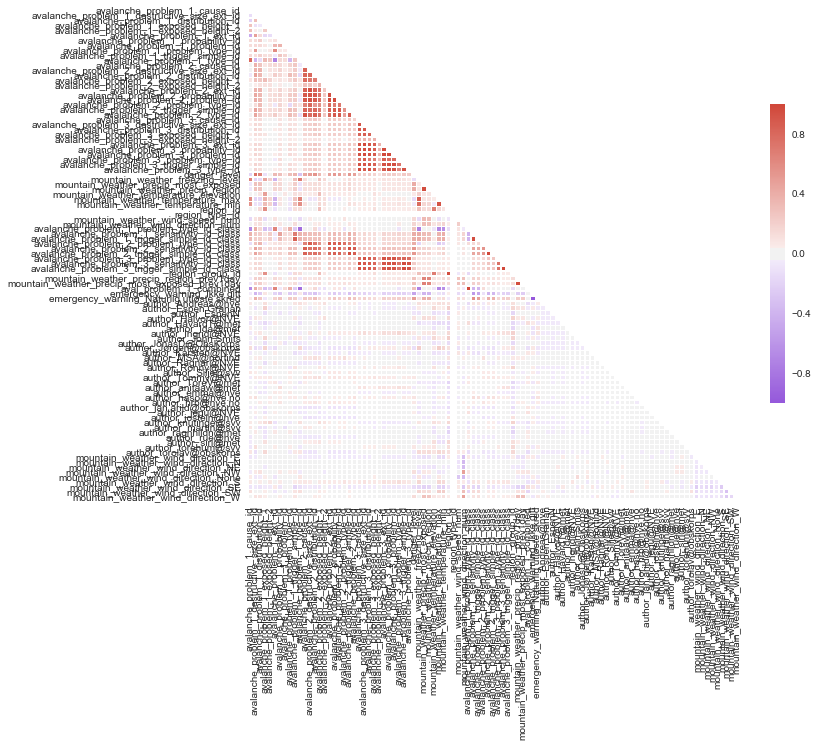

In [16]:
# Compute the correlation matrix - works only on numerical variables.
corr = varsom_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1000, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We can see that some parameters are highly correlated. These are mainly the parameters belonging to the same avalanche problem. Depending on the ML algorithm we use we have to remove some of them.

In [17]:
#corr['avalanche_problem_1_cause_id'].sort_values(ascending=False)
#corr

In [18]:
#sns.pairplot(varsom_df.drop(['date_valid'], axis=1))

In [19]:
# let's see the details about remainig variables 

varsom_df.describe()

,avalanche_problem_1_cause_id,avalanche_problem_1_destructive_size_ext_id,avalanche_problem_1_distribution_id,avalanche_problem_1_exposed_height_1,avalanche_problem_1_exposed_height_2,avalanche_problem_1_ext_id,avalanche_problem_1_probability_id,avalanche_problem_1_problem_id,avalanche_problem_1_problem_type_id,avalanche_problem_1_trigger_simple_id,...,author_torolav@obskorps,mountain_weather_wind_direction_E,mountain_weather_wind_direction_N,mountain_weather_wind_direction_NE,mountain_weather_wind_direction_NW,mountain_weather_wind_direction_None,mountain_weather_wind_direction_S,mountain_weather_wind_direction_SE,mountain_weather_wind_direction_SW,mountain_weather_wind_direction_W
count,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,...,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000
mean,14.857928,2.159864,1.805338,617.870225,62.611198,19.344584,3.019885,0.997907,14.845631,18.843276,...,0.040555,0.100471,0.033229,0.052329,0.066457,0.019362,0.118786,0.315542,0.170591,0.123234
std,5.313807,0.671965,0.565790,355.952656,197.157994,2.513152,0.376101,0.045709,11.530338,4.701593,...,0.197282,0.300666,0.179257,0.222718,0.249112,0.137810,0.323579,0.464792,0.376201,0.328749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,2.000000,1.000000,300.000000,0.000000,20.000000,3.000000,1.000000,7.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,2.000000,2.000000,600.000000,0.000000,20.000000,3.000000,1.000000,10.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,3.000000,2.000000,900.000000,0.000000,20.000000,3.000000,1.000000,30.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,24.000000,4.000000,3.000000,2100.000000,2000.000000,25.000000,5.000000,1.000000,50.000000,22.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Save data for further analysis

In [20]:
varsom_df.to_csv('varsom_ml_preproc.csv', index_label='index')

#### Now we have clean data and can build a model

The library we'll use is called **sckit-learn**. 

http://scikit-learn.org

- Python library
- Access to well known machine learning algorithms
- Built on NumPy, SciPy, and matplotlib
- Open Source
- Well documented with many good tutorials


## Worklflow of scikit-learn

- Create model object
- .fit
- .predict
- evaluate